In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd  /content/drive/MyDrive/Colab Notebooks/1Learning/NLP 3 sem/2024_12_30 hugging face transformenrs/Occupation_bias

/content/drive/MyDrive/Colab Notebooks/1Learning/NLP 3 sem/2024_12_30 hugging face transformenrs/Occupation_bias


In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
from datasets import load_dataset, DatasetDict, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

train_dataset = load_dataset("LabHC/bias_in_bios", split='train').select(range(10_000))
test_dataset = load_dataset("LabHC/bias_in_bios", split='test').select(range(10000))
val_dataset = load_dataset("LabHC/bias_in_bios", split='dev')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.30k [00:00<?, ?B/s]

(…)-00000-of-00001-0ab65b32c47407e8.parquet:   0%|          | 0.00/64.9M [00:00<?, ?B/s]

(…)-00000-of-00001-5598c840ce8de1ee.parquet:   0%|          | 0.00/24.9M [00:00<?, ?B/s]

(…)-00000-of-00001-e6551072fff26949.parquet:   0%|          | 0.00/9.95M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/257478 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/99069 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/39642 [00:00<?, ? examples/s]

In [ ]:
profession_label_mapping = {
    'accountant': 0,
    'architect': 1,
    'attorney': 2,
    'chiropractor': 3,
    'comedian': 4,
    'composer': 5,
    'dentist': 6,
    'dietitian': 7,
    'dj': 8,
    'filmmaker': 9,
    'interior_designer': 10,
    'journalist': 11,
    'model': 12,
    'nurse': 13,
    'painter': 14,
    'paralegal': 15,
    'pastor': 16,
    'personal_trainer': 17,
    'photographer': 18,
    'physician': 19,
    'poet': 20,
    'professor': 21,
    'psychologist': 22,
    'rapper': 23,
    'software_engineer': 24,
    'surgeon': 25,
    'teacher': 26,
    'yoga_teacher': 27
}
label_profession_mapping = {v: k for k, v in profession_label_mapping.items()}

gender_id_mapping = {'Male': 0, 'Female': 1}
id_gender_mapping = {v: k for k, v in gender_id_mapping.items()}

In [ ]:
test_df = pd.read_csv('df_test_contrast_pvalue_10k.csv')

In [ ]:
train_dataset

Dataset({
    features: ['hard_text', 'profession', 'gender'],
    num_rows: 10000
})

In [ ]:
test_dataset

Dataset({
    features: ['hard_text', 'profession', 'gender'],
    num_rows: 10000
})

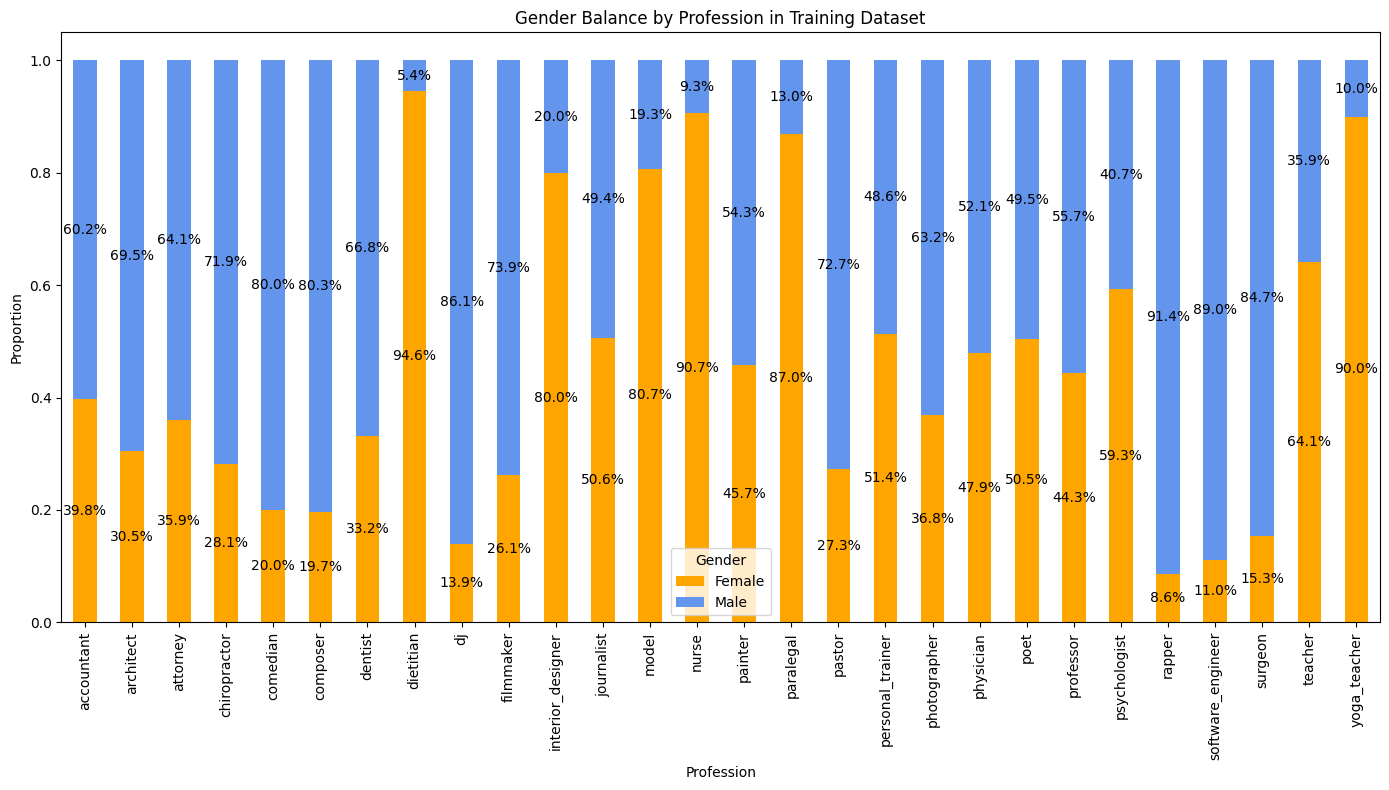

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df = train_dataset.to_pandas()
total_counts = train_df.groupby('profession')['gender'].count()

# Map profession label IDs back to profession names for plotting
train_df['profession'] = train_df['profession'].map(label_profession_mapping)

# Map gender IDs back to gender names for plotting
train_df['gender'] = train_df['gender'].map(id_gender_mapping)

# Get gender balance per profession for the test dataset
gender_balance_by_profession_train = train_df.groupby('profession')['gender'].value_counts(normalize=True).unstack()


# Plot with specified colors and get the axes object for annotations
ax = gender_balance_by_profession_train.plot(kind='bar', stacked=True, figsize=(14, 8), color={'Male': 'cornflowerblue', 'Female': 'orange'})





plt.title('Gender Balance by Profession in Training Dataset')
plt.xlabel('Profession')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()

# Add percentage labels
for c in ax.containers:
    labels = [f'{w*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


<Figure size 1400x800 with 0 Axes>

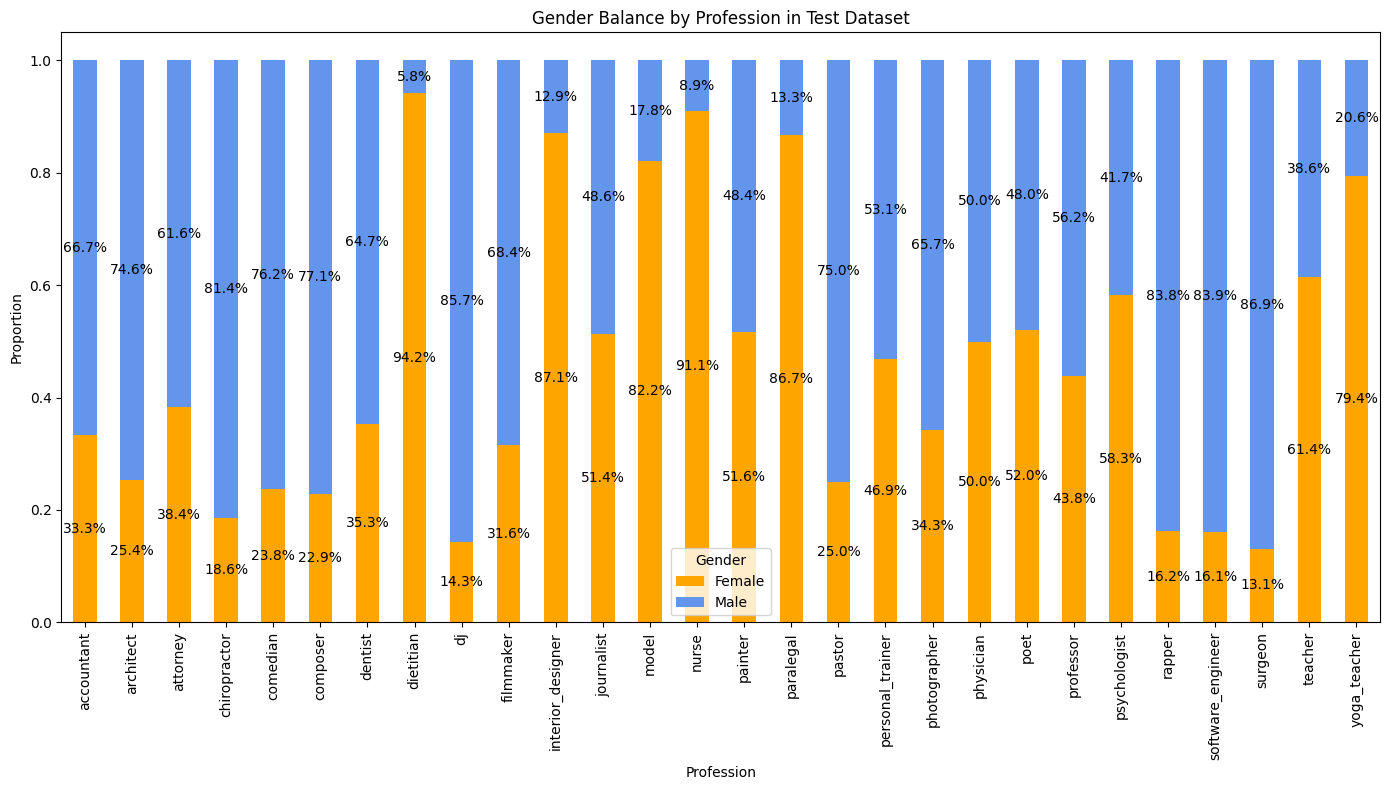

In [ ]:
test_df = test_dataset.to_pandas()

# Map profession label IDs back to profession names for plotting
test_df['profession'] = test_df['profession'].map(label_profession_mapping)

# Map gender IDs back to gender names for plotting
test_df['gender'] = test_df['gender'].map(id_gender_mapping)

# Get gender balance per profession for the test dataset
gender_balance_by_profession_test = test_df.groupby('profession')['gender'].value_counts(normalize=True).unstack()

# Plot with specified colors and get the axes object for annotations
plt.figure(figsize=(14, 8))
ax_test = gender_balance_by_profession_test.plot(kind='bar', stacked=True, figsize=(14, 8), color={'Male': 'cornflowerblue', 'Female': 'orange'})

plt.title('Gender Balance by Profession in Test Dataset')
plt.xlabel('Profession')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()

# Add percentage labels
for c in ax_test.containers:
    labels = [f'{w*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax_test.bar_label(c, labels=labels, label_type='center')

plt.show()

In [ ]:
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)
import torch
from sklearn.metrics import accuracy_score
import numpy as np

# Инициализация токенизатора
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Функция для токенизации
def tokenize_function(examples):
    return tokenizer(
        examples['hard_text'],
        truncation=True,
        padding='max_length',
        max_length=128
    )

# Токенизация данных
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

# Форматирование для PyTorch
tokenized_train = tokenized_train.rename_column('profession', 'labels')
tokenized_test = tokenized_test.rename_column('profession', 'labels')
tokenized_val = tokenized_val.rename_column('profession', 'labels')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/39642 [00:00<?, ? examples/s]

In [ ]:
!unzip bert_professions_10k_3epoch.zip

Archive:  bert_professions_10k_3epoch.zip
   creating: bert_professions_10k_3epoch/
  inflating: bert_professions_10k_3epoch/training_args.bin  
  inflating: bert_professions_10k_3epoch/model.safetensors  
  inflating: bert_professions_10k_3epoch/config.json  


In [ ]:
ls

 bert_professions_10k_3epoch.pt/
'bias_in_bios_bert_and_fairness (1).ipynb'
'bias_in_bios_bert_and_fairness (2)_10knew.ipynb'
'Copy of bias_in_bios_bert_and_fairness.ipynb'
 results/
 shap_values_10k_bias_in_bios.pkl
 shap_values_bias_in_bios.pkl
 shap_values_occupation_bias_14_05
 test_df_occupation_bias_contrast.csv


In [ ]:

columns = ['input_ids', 'attention_mask', 'labels']
tokenized_train.set_format(type='torch', columns=columns)
tokenized_test.set_format(type='torch', columns=columns)
tokenized_val.set_format(type='torch', columns=columns)

#Инициализация модели
# model = BertForSequenceClassification.from_pretrained(
#     'bert_professions_10k_3epoch.pt',
#     num_labels=len(profession_label_mapping)
# ) ## transfer learning
model = BertForSequenceClassification.from_pretrained(
    'bert_professions_10k_3epoch.pt',
    num_labels=len(profession_label_mapping)
) ## already fine-tuned

# Метрика для оценки
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {'accuracy': accuracy_score(labels, predictions)}

# Аргументы обучения
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    eval_strategy='epoch',
    logging_dir='./logs',
    save_strategy='epoch',
    load_best_model_at_end=True,
    report_to="none"
)

# Тренировка
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

In [ ]:
 trainer.train()

/home/shchegolev/miniconda3/envs/p312b/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.766099,0.794183
2,0.971300,0.672319,0.817819
3,0.971300,0.678506,0.821225


/home/shchegolev/miniconda3/envs/p312b/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/shchegolev/miniconda3/envs/p312b/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=939, training_loss=0.6903893061466237, metrics={'train_runtime': 143.1114, 'train_samples_per_second': 209.627, 'train_steps_per_second': 6.561, 'total_flos': 1973793576960000.0, 'train_loss': 0.6903893061466237, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

/home/shchegolev/miniconda3/envs/p312b/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 0.6723188161849976,
 'eval_accuracy': 0.817819484385248,
 'eval_runtime': 19.2953,
 'eval_samples_per_second': 2054.494,
 'eval_steps_per_second': 16.066}

In [ ]:
# trainer.save_model("bert_professions_10k_3epoch")

In [ ]:
# !zip -r bert_professions_10k_3epoch.zip bert_professions_10k_3epoch

  adding: bert_professions_10k_3epoch/ (stored 0%)
  adding: bert_professions_10k_3epoch/training_args.bin (deflated 52%)
  adding: bert_professions_10k_3epoch/model.safetensors (deflated 7%)
  adding: bert_professions_10k_3epoch/config.json (deflated 65%)


In [ ]:
# Получение предсказаний
predictions = trainer.predict(tokenized_test)
preds = np.argmax(predictions.predictions, axis=1)

# Добавление предсказаний в DataFrame
test_df = test_dataset.to_pandas()
test_df['pred'] = preds

In [ ]:
test_df


,hard_text,profession,gender,pred,female,male,profession_name,contrast,pvalue,statistic
0,"He specializes in development economics, house...",21,0,21,0,1,professor,0.931362,0.473569,0.716785
1,He started out as a DJ and music producer in t...,5,0,5,0,1,composer,0.731188,0.636155,0.475691
2,"She is averse to all things scary or sad, so s...",4,1,4,1,0,comedian,0.825299,0.524705,-0.644305
3,"Prior to joining USC, she was a mobile news ed...",21,1,21,1,0,professor,0.712149,0.473569,0.716785
4,"Previously, she served as an assistant profess...",21,1,21,1,0,professor,0.965314,0.473569,0.716785
...,...,...,...,...,...,...,...,...,...,...
9995,Areas of expertise for Dr. Mildner include dep...,22,1,22,1,0,psychologist,0.850785,0.322658,0.990152
9996,He initiated the Peacemakers Martial Arts prog...,16,0,26,0,1,pastor,0.026896,0.042872,2.107073
9997,He has expertise in numerous aspects of law in...,11,0,2,0,1,journalist,0.358569,0.590251,-0.538822
9998,"He holds degrees in studio art, art history an...",21,0,21,0,1,professor,0.910868,0.473569,0.716785


##Classification report from uploaded preds from the file

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(test_df["profession"], test_df["pred"]))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       132
           1       0.62      0.62      0.62       252
           2       0.83      0.90      0.86       805
           3       0.94      0.55      0.69        86
           4       0.90      0.69      0.78        80
           5       0.71      0.86      0.78       140
           6       0.90      0.95      0.92       382
           7       0.81      0.85      0.83       103
           8       0.88      0.66      0.75        35
           9       0.86      0.76      0.81       212
          10       1.00      0.03      0.06        31
          11       0.79      0.75      0.77       500
          12       0.77      0.80      0.79       202
          13       0.80      0.85      0.82       459
          14       0.87      0.75      0.81       186
          15       0.00      0.00      0.00        45
          16       0.65      0.62      0.64        76
          17       0.81    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Old model classification report

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(test_df["profession"], test_df["pred"]))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       132
           1       0.59      0.65      0.62       252
           2       0.84      0.88      0.86       805
           3       0.94      0.55      0.69        86
           4       0.84      0.72      0.78        80
           5       0.72      0.89      0.79       140
           6       0.85      0.96      0.90       382
           7       0.79      0.87      0.83       103
           8       0.77      0.66      0.71        35
           9       0.85      0.80      0.82       212
          10       0.83      0.16      0.27        31
          11       0.79      0.72      0.75       500
          12       0.79      0.81      0.80       202
          13       0.80      0.82      0.81       459
          14       0.83      0.74      0.78       186
          15       0.00      0.00      0.00        45
          16       0.61      0.66      0.63        76
          17       0.68    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


test_df_m = test_df[test_df['gender']==0]
test_df_f = test_df[test_df['gender']==1]
test_df_m.count()


,0
hard_text,5425
profession,5425
gender,5425
pred,5425
female,5425
male,5425
profession_name,5425
contrast,5425
pvalue,5425
statistic,5425


In [ ]:
test_df_m

,hard_text,profession,gender,pred
0,"He specializes in development economics, house...",21,0,21
1,He started out as a DJ and music producer in t...,5,0,5
5,He holds a degree in B.A.Arch from the Univers...,1,0,16
9,He is cross-appointed in the departments of Pa...,21,0,21
10,He is a Principal Scientist at Elisabeth Bruye...,21,0,19
...,...,...,...,...
9994,"Mr. Racowsky practices medicine in Phoenix, AZ...",19,0,19
9996,He initiated the Peacemakers Martial Arts prog...,16,0,26
9997,He has expertise in numerous aspects of law in...,11,0,2
9998,"He holds degrees in studio art, art history an...",21,0,21


In [ ]:
test_df_f.count()

,0
hard_text,4575
profession,4575
gender,4575
pred,4575


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_df_f["profession"], test_df_f["pred"]))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64        44
           1       0.54      0.70      0.61        64
           2       0.82      0.90      0.86       309
           3       1.00      0.50      0.67        16
           4       0.93      0.68      0.79        19
           5       0.68      0.84      0.75        32
           6       0.92      0.95      0.93       135
           7       0.84      0.88      0.86        97
           8       1.00      0.40      0.57         5
           9       0.91      0.78      0.84        67
          10       1.00      0.04      0.07        27
          11       0.80      0.75      0.77       257
          12       0.80      0.87      0.83       166
          13       0.79      0.87      0.83       418
          14       0.92      0.69      0.79        96
          15       0.00      0.00      0.00        39
          16       0.50      0.42      0.46        19
          17       0.73    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_df_m["profession"], test_df_m["pred"]))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        88
           1       0.66      0.59      0.63       188
           2       0.83      0.90      0.86       496
           3       0.93      0.56      0.70        70
           4       0.89      0.69      0.78        61
           5       0.73      0.86      0.79       108
           6       0.89      0.95      0.92       247
           7       0.38      0.50      0.43         6
           8       0.88      0.70      0.78        30
           9       0.83      0.76      0.79       145
          10       0.00      0.00      0.00         4
          11       0.78      0.74      0.76       243
          12       0.61      0.47      0.53        36
          13       0.96      0.63      0.76        41
          14       0.84      0.81      0.82        90
          15       0.00      0.00      0.00         6
          16       0.70      0.68      0.69        57
          17       0.91    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


hard_texts_for_profession_13_and_wrong_pred = test_df_f[(test_df_f['profession'] == 13) & (test_df_f['pred'] != 13)]['hard_text']



In [ ]:


hard_texts_for_profession_13_and_wrong_pred_with_profession = test_df_m[(test_df_m['profession'] == 13) & (test_df_m['pred'] != 13)][['hard_text', 'profession']]
hard_texts_for_profession_13_and_wrong_pred_with_profession

,hard_text,profession
159,By using an overlay of the symbol on a map of ...,13
367,"Through his employer, North Country HealthCare...",13
1037,He's only able to practice medicine there beca...,13
1433,He writes from Guilford and welcomes comments ...,13
1698,Marc Rivo is a senior physician executive with...,13
2430,While currently employed at Arroyo Grande Hosp...,13
2954,Mr. Gregory Crowder's NPI Number is #143713622...,13
3924,He states he was instrumental in uncovering co...,13
4186,Mr. Nicolas Richard Lazarewicz's NPI Number is...,13
8331,He graduated from Husson University in Bangor ...,13


In [ ]:


hard_texts_for_profession_13_and_wrong_pred_with_profession.to_csv('male_13nurse_texts.csv')

In [ ]:

hard_texts_for_profession_13_and_wrong_pred_with_profession = test_df_f[(test_df_f['profession'] == 13) & (test_df_f['pred'] != 13)][['hard_text', 'profession','gender']]
hard_texts_for_profession_13_and_wrong_pred_with_profession

,hard_text,profession,gender
87,Mrs. Kristina A Burkland's NPI Number is #1487...,13,1
115,World War 2 AU100 - Rated: T - English - Roman...,13,1
131,She has worked as a case manager / rehabilitat...,13,1
499,She is a certified diabetes educator specializ...,13,1
613,Mrs. Jennifer Susan Gorelov's NPI Number is #1...,13,1
...,...,...,...
9343,"She received her PhD from SUNY in Buffalo, MA ...",13,1
9457,"As part of her clinical training, she worked i...",13,1
9718,"Sarah maintains a personal blog, Planet Josh, ...",13,1
9763,"Her debut novel, Nightshifted, came out from S...",13,1


In [ ]:

hard_texts_for_profession_13_and_wrong_pred_with_profession.to_csv('female_13nurse_texts.csv')

In [ ]:

test_df['hard_text'] = test_dataset['hard_text']
print(test_df[['hard_text', 'pred', 'profession', 'gender']].head())

                                           hard_text  pred  profession  gender
0  He specializes in development economics, house...    21          21       0
1  He started out as a DJ and music producer in t...     5           5       0
2  She is averse to all things scary or sad, so s...     4           4       1
3  Prior to joining USC, she was a mobile news ed...    11          21       1
4  Previously, she served as an assistant profess...    21          21       1


In [ ]:
test_dataset['hard_text']

['He specializes in development economics, household economics, and personnel economics. In 2003 he received his Ph.D. in Economics from the London School of Economics. Previously, he has worked as an Assistant Professor of Economics at the University of Chicago, Graduate School of Business and also, as a consultant for the World Bank. Centre for Research and Analysis of Migration',
 "He started out as a DJ and music producer in the electronic music scene in London during the mid 90's. In 2006 he was hired as a composer and music supervisor for Viacom's MTV Networks. At MTV, Emanuel would score several title songs and trailers for programs such as Next, Exposed, the Agency, the MTV Movie Awards and the MTV Music Video Awards. In 2009 Emanuel launched the online searchable music catalog UrbanStyleMusic.com (USM). USM is a one-stop-shop music website for agencies and production companies.",
 'She is averse to all things scary or sad, so she grew up almost exclusively watching sitcoms, ro

In [ ]:
from holisticai.bias.metrics import classification_bias_metrics
from holisticai.datasets import load_dataset
from holisticai.bias.plots import bias_metrics_report

In [ ]:
test_df['female'] = (test_df.gender == 1).astype(int)
test_df['male'] = (test_df.gender == 0).astype(int)

In [ ]:
test_df

,hard_text,profession,gender,pred
0,"He specializes in development economics, house...",21,0,21
1,He started out as a DJ and music producer in t...,5,0,5
2,"She is averse to all things scary or sad, so s...",4,1,4
3,"Prior to joining USC, she was a mobile news ed...",21,1,11
4,"Previously, she served as an assistant profess...",21,1,21
...,...,...,...,...
9995,Areas of expertise for Dr. Mildner include dep...,22,1,22
9996,He initiated the Peacemakers Martial Arts prog...,16,0,26
9997,He has expertise in numerous aspects of law in...,11,0,2
9998,"He holds degrees in studio art, art history an...",21,0,21


In [ ]:
test_df

,hard_text,profession,gender,pred,female,male
0,"He specializes in development economics, house...",21,0,21,0,1
1,He started out as a DJ and music producer in t...,5,0,5,0,1
2,"She is averse to all things scary or sad, so s...",4,1,4,1,0
3,"Prior to joining USC, she was a mobile news ed...",21,1,21,1,0
4,"Previously, she served as an assistant profess...",21,1,21,1,0
...,...,...,...,...,...,...
995,He gained experience as a photographer for var...,18,0,18,0,1
996,He currently practices at New England Surgical...,25,0,25,0,1
997,Prior to coming to Luther for the Masters of A...,16,0,16,0,1
998,Caroline has several years of experience in pr...,7,1,7,1,0


In [ ]:
profession_label_mapping

{'accountant': 0,
 'architect': 1,
 'attorney': 2,
 'chiropractor': 3,
 'comedian': 4,
 'composer': 5,
 'dentist': 6,
 'dietitian': 7,
 'dj': 8,
 'filmmaker': 9,
 'interior_designer': 10,
 'journalist': 11,
 'model': 12,
 'nurse': 13,
 'painter': 14,
 'paralegal': 15,
 'pastor': 16,
 'personal_trainer': 17,
 'photographer': 18,
 'physician': 19,
 'poet': 20,
 'professor': 21,
 'psychologist': 22,
 'rapper': 23,
 'software_engineer': 24,
 'surgeon': 25,
 'teacher': 26,
 'yoga_teacher': 27}

In [ ]:
target = 'software_engineer' ## bias in nurse position
target_id = profession_label_mapping[target]
metrics = classification_bias_metrics(
    group_a = test_df['female'],
    group_b = test_df['male'],
    y_true = (test_df['profession'] == target_id).astype(int),
    y_pred = (test_df['pred'] == target_id).astype(int)
    )

# create a comprehensive report
bias_metrics_report(model_type='binary_classification', table_metrics=metrics);

In [ ]:
# new shap example code
import transformers
import shap

pred = transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=0,
    return_all_scores=True,
)

explainer = shap.Explainer(pred)

# shap_values = explainer(test_df["hard_text"])

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
##############RUN CAREFULLY SAVING SHAP######################

# import joblib

# joblib.dump(shap_values, 'shap_values_10k_bias_in_bios.pkl')



['shap_values_10k_bias_in_bios.pkl']

In [ ]:
 import numpy as np
 import scipy as sp
 import torch
 import transformers

 import shap
 import joblib
 shap_values = joblib.load("shap_values_10k_bias_in_bios.pkl")

## Shap values sum test df by professions

In [ ]:
from tqdm import tqdm

def get_values_for_indicators(sv, indicators=['he', 'his', 'her', 'she']):
    cls_values = np.ones_like(sv.base_values) * 0# * sv.base_values
    for i in range(len(sv.base_values)):
        for v, d in zip(sv.values[:, i], sv.data):
            if d.strip().lower() in indicators:
                cls_values[i] += np.abs(v)
    return cls_values

d = []
for sv in tqdm(shap_values, total=len(shap_values)):
    d.append(get_values_for_indicators(sv))
r = np.array(d).sum(axis=0)

In [ ]:
sv.values.shape

(89, 28)

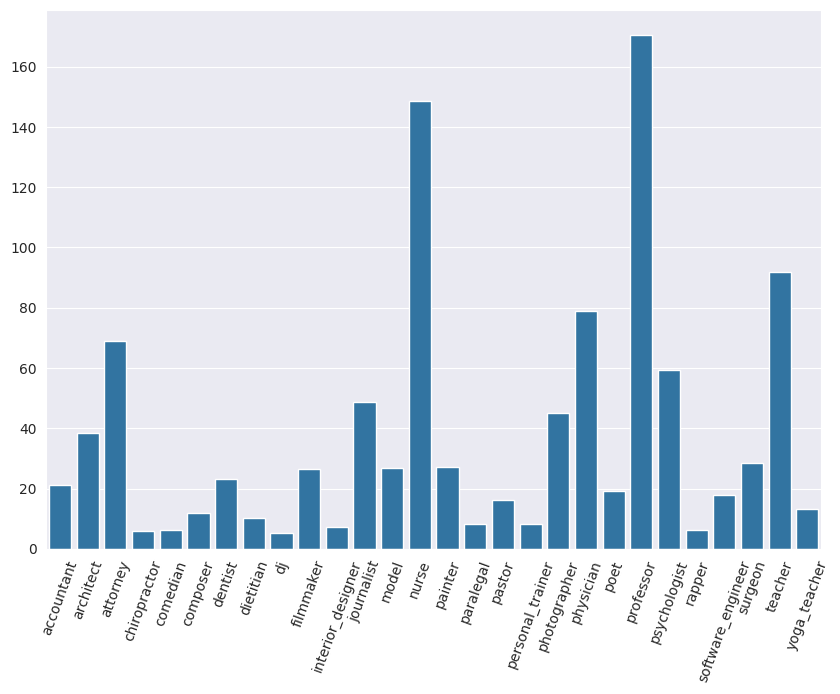

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x=[label_profession_mapping.get(i) for i in range(len(r))], y=r)
plt.xticks(rotation=70);

## Synthetic texts

In [ ]:
male_values = []
female_values = []

for pid, prof in label_profession_mapping.items():
    text_female = f"she is a {prof}"
    text_male = f"he is a {prof}"
    shap_value_female = explainer([text_female])
    shap_value_male = explainer([text_male])
    male_values.append(shap_value_male.values[0, 1, pid])
    female_values.append(shap_value_female.values[0, 1, pid])

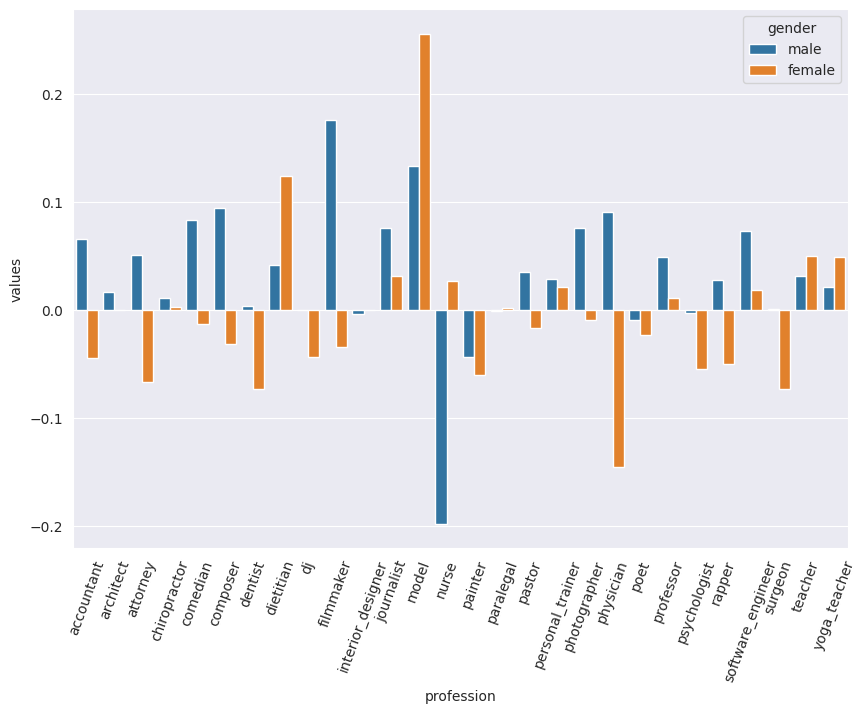

In [ ]:
plt.figure(figsize=(10, 7))
pltdf = pd.DataFrame({'profession': [label_profession_mapping[pid] for pid in range(len(label_profession_mapping))] * 2,
                      'values': male_values + female_values,
                      'gender': ['male'] * len(male_values) + ['female'] * len(female_values)})
sns.barplot(pltdf, x='profession', y='values', hue='gender')
plt.xticks(rotation=70);

## Contrastiveness

In [ ]:
test_df

NameError: name 'test_df' is not defined

In [ ]:
test_df

,hard_text,profession,gender,pred,female,male
0,"He specializes in development economics, house...",21,0,21,0,1
1,He started out as a DJ and music producer in t...,5,0,5,0,1
2,"She is averse to all things scary or sad, so s...",4,1,4,1,0
3,"Prior to joining USC, she was a mobile news ed...",21,1,21,1,0
4,"Previously, she served as an assistant profess...",21,1,21,1,0
...,...,...,...,...,...,...
995,He gained experience as a photographer for var...,18,0,18,0,1
996,He currently practices at New England Surgical...,25,0,25,0,1
997,Prior to coming to Luther for the Masters of A...,16,0,16,0,1
998,Caroline has several years of experience in pr...,7,1,7,1,0


In [ ]:
def calc_contrast(sv, gender, pid):
    v = sv.values[:, pid]
    pos = np.abs(v[v > 0].sum())
    neg = np.abs(v[v < 0].sum())
    return max(pos, neg) / (1 + min(pos, neg))

In [ ]:
from tqdm import tqdm
import joblib

results = joblib.Parallel(n_jobs=40, backend='threading')(
    joblib.delayed(calc_contrast)(sv, gen, prof) for sv, prof, gen in tqdm(zip(shap_values, test_df.profession.values, test_df.gender.values), total=test_df.shape[0])
)

 84%|████████▎ | 8350/10000 [2:55:05<40:47,  1.48s/it]

In [ ]:
import joblib

results = joblib.Parallel(n_jobs=40, backend='threading')(
    joblib.delayed(calc_contrast)(sv, gen, prof) for sv, prof, gen in tqdm(zip(shap_values, test_df.profession.values, test_df.gender.values), total=test_df.shape[0])
)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [2:06:08<00:00,  1.32it/s]


In [ ]:
results = []
for sv, prof, gen in tqdm(zip(shap_values, test_df.profession.values, test_df.gender.values), total=test_df.shape[0]):
    results.append(calc_contrast(sv, gen, prof))

In [ ]:
test_df['profession_name'] = test_df.profession.apply(label_profession_mapping.get)
test_df['contrast'] = results

##COmpare the contrast for all items for professions

In [ ]:


contrast_by_profession = test_df.groupby('profession_name')['contrast'].apply(list).to_dict()

# Example of accessing the list for a specific profession
# print(contrast_by_profession['accountant'])


##Contrast visual analysis

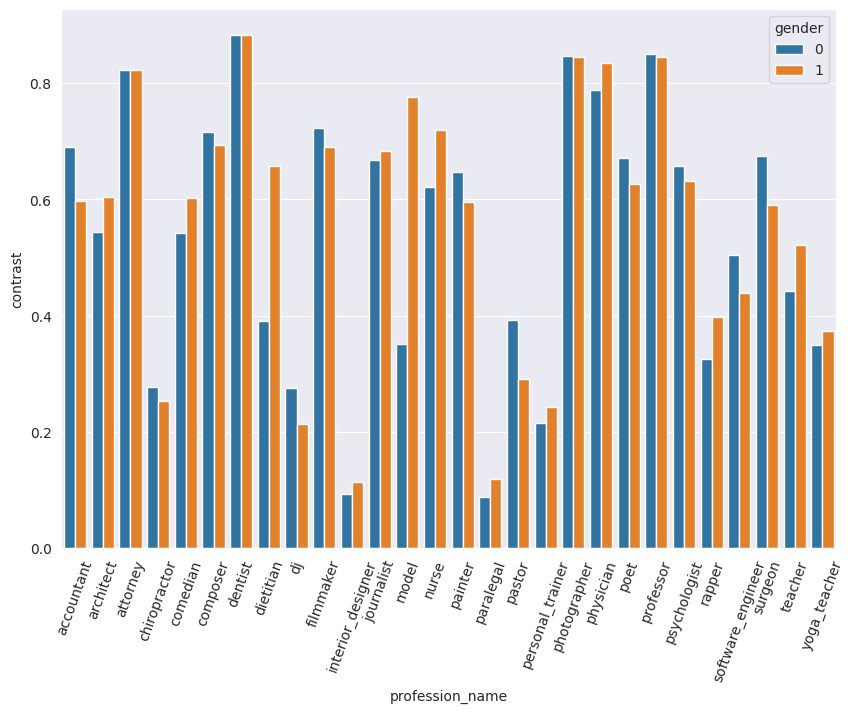

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(test_df.groupby(['profession_name', 'gender'])['contrast'].mean().reset_index(),
            x='profession_name',
            y='contrast',
            hue='gender')
plt.xticks(rotation=70);

In [ ]:
test_df2 = pd.read_csv('testdf_contrast_and_stats.csv')

In [ ]:
test_df2

,profession,pvalue,statistic,2SD Rule,Accuracy Difference,Average Odds Difference,Cohen D,Disparate Impact,Equality of Opportunity Difference,False Positive Rate Difference,Four Fifths Rule,Statistical Parity
0,accountant,1.146471e-01,1.596387,-2.330430,-0.000611,-0.056391,-0.046791,0.666175,-0.113636,0.000854,0.666175,-0.005477
1,architect,1.528331e-01,-1.440521,-3.956366,0.011839,0.055326,-0.079477,0.596446,0.112699,-0.002048,0.596446,-0.012423
2,attorney,9.904053e-01,-0.012030,-4.314685,0.005479,-0.001621,-0.086688,0.752182,0.000483,-0.003726,0.752182,-0.024485
3,chiropractor,7.228287e-01,0.359414,-4.233163,0.004519,-0.028852,-0.085047,0.225865,-0.057143,-0.000560,0.225865,-0.005993
4,comedian,5.247051e-01,-0.644305,-3.585233,0.002894,-0.002513,-0.072011,0.353215,-0.004314,-0.000713,0.353215,-0.005603
5,composer,6.361547e-01,0.475691,-5.756842,0.005282,-0.010541,-0.115747,0.370560,-0.017361,-0.003721,0.370560,-0.014851
6,dentist,9.576742e-01,-0.053121,-4.672170,0.003808,-0.003293,-0.093885,0.621982,-0.003269,-0.003316,0.621982,-0.018465
7,dietitian,1.300737e-01,-1.794048,9.884808,-0.004646,0.189470,0.199392,14.970628,0.376289,0.002650,0.066797,0.020602
8,dj,3.956156e-01,0.932647,-3.900309,0.001556,-0.150278,-0.078349,0.098816,-0.300000,-0.000556,0.098816,-0.003987
9,filmmaker,4.838937e-01,0.702243,-4.343705,0.006135,0.007221,-0.087272,0.512047,0.017499,-0.003058,0.512047,-0.011873


In [ ]:
test_df.to_csv('test_df_10k.csv', index=False)

In [ ]:
from scipy.stats import ttest_ind

ttest_res = {'profession': [], 'pvalue': [], 'statistic': []}
for profession, pid in profession_label_mapping.items():
    subm = test_df[(test_df['profession'] == pid) & (test_df['gender'] == gender_id_mapping['Male'])]['contrast'].values
    subf = test_df[(test_df['profession'] == pid) & (test_df['gender'] == gender_id_mapping['Female'])]['contrast'].values
    tt = ttest_ind(subm, subf, equal_var=False)
    ttest_res['profession'].append(profession)
    ttest_res['pvalue'].append(tt.pvalue)
    ttest_res['statistic'].append(tt.statistic)
ttest_res = pd.DataFrame(ttest_res).dropna()

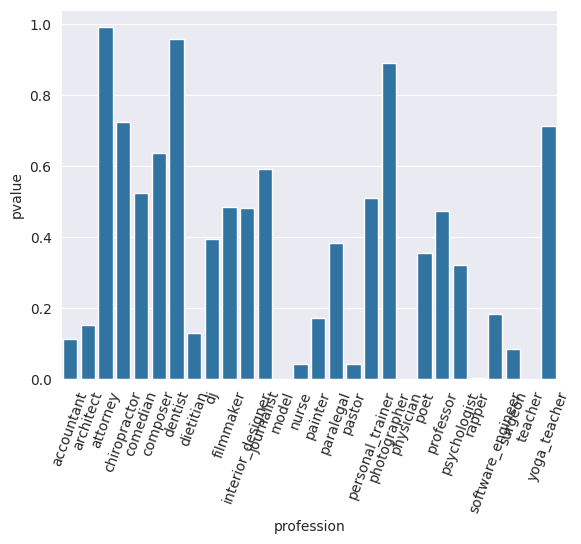

In [ ]:
sns.barplot(data=ttest_res, x='profession', y='pvalue')
plt.xticks(rotation=70);

In [ ]:
ttest_res

,profession,pvalue,statistic
0,accountant,1.146471e-01,1.596387
1,architect,1.528331e-01,-1.440521
2,attorney,9.904053e-01,-0.012030
3,chiropractor,7.228287e-01,0.359414
4,comedian,5.247051e-01,-0.644305
5,composer,6.361547e-01,0.475691
6,dentist,9.576742e-01,-0.053121
7,dietitian,1.300737e-01,-1.794048
8,dj,3.956156e-01,0.932647
9,filmmaker,4.838937e-01,0.702243


In [ ]:
ttest_res_ = ttest_res.copy()
ttest_res_['profession'] = ttest_res_['profession'].apply(profession_label_mapping.get)

In [ ]:
test_df.merge(ttest_res_, on='profession', how='left').to_csv('df_test_contrast_pvalue_10k.csv', index=False)